In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('Data/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [33]:
df.shape

(100000, 9)

In [34]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [35]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [37]:
df.age=df.age.astype(int)

In [38]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [39]:
df.age.value_counts()

age
80    5621
51    1619
47    1574
48    1568
53    1542
      ... 
76     733
77     730
75     721
78     682
79     621
Name: count, Length: 81, dtype: int64

In [40]:
df.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [41]:
df.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [42]:
df.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [43]:
def clean_smoking_history(value):
    
    if value == "No Info":
        return "no info"
    elif value == "ever":
        return "current"
    elif value == "not current":
        return "former"
    else:
        return value
    
df.smoking_history = df.smoking_history.apply(clean_smoking_history)

In [44]:
df.bmi.value_counts()

bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

In [45]:
df.HbA1c_level.value_counts()

HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [46]:
df.blood_glucose_level.value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [47]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [48]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [49]:
fe= df.select_dtypes(include=['number'])
fe.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

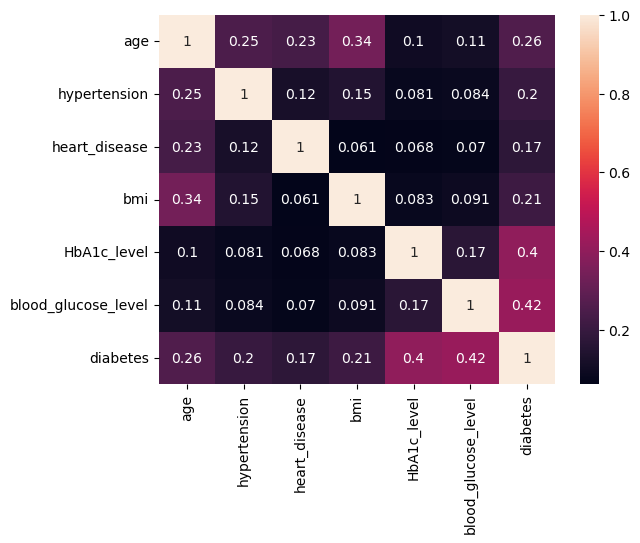

In [50]:
corr_matrix = fe.corr()
sns.heatmap(corr_matrix, annot = True)

In [51]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [52]:
def outlier_remove(num_cols):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.suptitle('Before Removing Outliers', y=1.02)
    plt.show()
    df_iqr = df.copy()
    for col in num_cols:
        Q1 = df_iqr[col].quantile(0.25)
        Q3 = df_iqr[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]
    
    print("Shape after basic IQR cleaning:", df_iqr.shape)
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(y=df_iqr[col])
        plt.title(col)
        plt.tight_layout()
    plt.suptitle('After IQR Cleaning', y=1.02)
    plt.show()
    return df_iqr

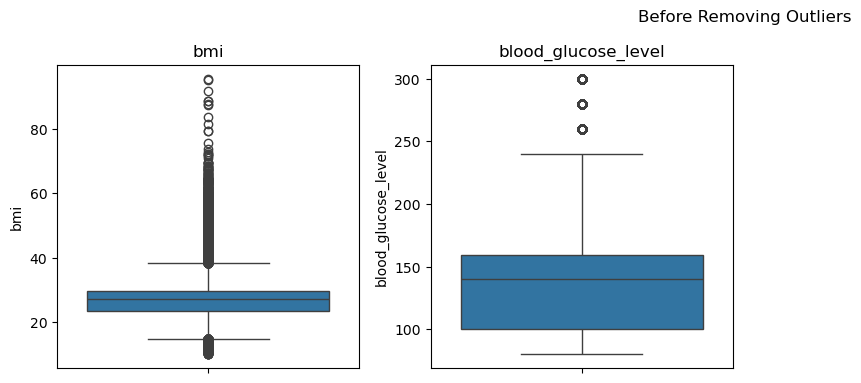

Shape after basic IQR cleaning: (91239, 9)


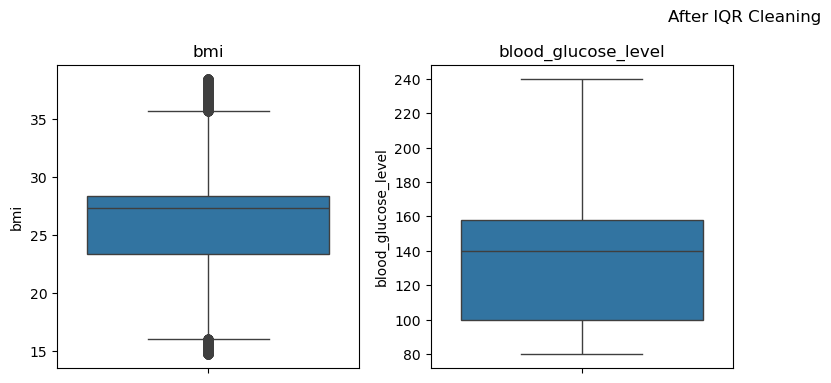

C:\Users\Ashish\AppData\Local\Temp\ipykernel_20076\2740948905.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[140.  80. 158. ... 155. 100.  90.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, ['bmi', 'blood_glucose_level']] = outlier_remove(df[['bmi', 'blood_glucose_level']])


In [53]:
df.loc[:, ['bmi', 'blood_glucose_level']] = outlier_remove(df[['bmi', 'blood_glucose_level']])

In [54]:

df['hypertension'] = np.where((df['hypertension'] == 1), "Yes", "No")
df['heart_disease'] = np.where((df['heart_disease'] == 1), "Yes", "No")

In [55]:
df.isna().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
smoking_history           0
bmi                    8761
HbA1c_level               0
blood_glucose_level    8761
diabetes                  0
dtype: int64

In [56]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [57]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [58]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,26.428792,5.527507,135.320300,0.085000
std,22.535417,4.671828,1.070672,33.790308,0.278883
min,0.000000,14.710000,3.500000,80.000000,0.000000
25%,24.000000,23.930000,4.800000,100.000000,0.000000
50%,43.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,27.780000,6.200000,158.000000,0.000000
max,80.000000,38.500000,9.000000,240.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 6.5+ MB


In [60]:
df.to_csv("Data/diabetes_clean.csv", index = False)